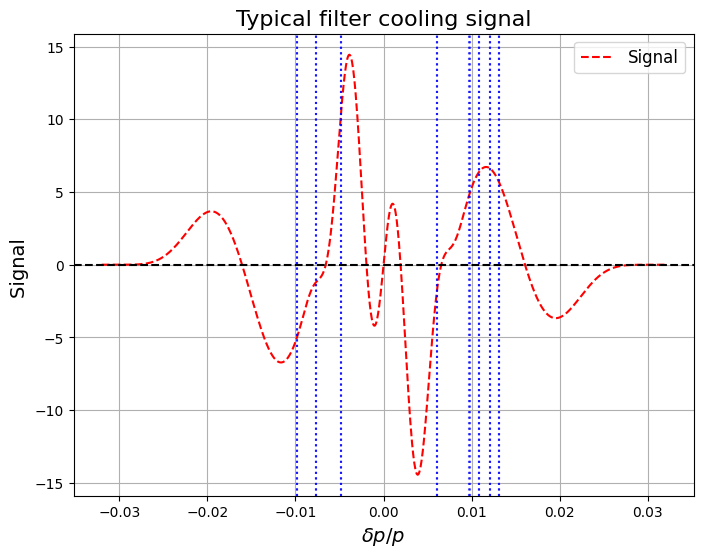

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the response function
def respL(Dt):
    result = np.zeros_like(Dt)
    mask = (Dt >= -1.6e-9) & (Dt <= 1.6e-9)
    result[mask] = (63e9 * Dt[mask]) * (1 - 6.5e18 * Dt[mask]**2) * (1 - 1.55e18 * Dt[mask]**2) * (1 - (0.625e9 * Dt[mask])**2)**8
    return result

# Define Dt range
dt = np.linspace(-1.6e-9, 1.6e-9, 1000)
dtn = 3 * dt

# Compute function values
respL_current = respL(dt)  
respL_previous = respL(dtn)  

# Compute the difference
signal_difference = respL_previous - respL_current

# Apply scale factor
scale_factor = 0.01 * 5e-6
dt_scaled = dt / scale_factor  # Apply scaling to x-axis

# Find zero crossings

delta_values = [
    -4.805392686369313e-05, -4.8428040825404626e-05,
    6.122474882956027e-05, 6.126377631897137e-05,
    -7.633267442255346e-05, -7.651748289060676e-05,
    9.71579315832694e-05, -9.773166602413147e-05,
    -9.774608364278737e-05, 9.776469561002636e-05,
    0.00010810864336687345, 0.00010812617302507509,
    0.00012081999876397635, 0.00012139810950903466,
    0.00013071923318959123, 0.0001311458136008897
]


# Plot
plt.figure(figsize=(8, 6))
plt.plot(dt_scaled, signal_difference, label=r'Signal', color='red', linestyle='--')
plt.axhline(0, color='black', linestyle='--')  # Reference line at y=0


for delta in delta_values:
  plt.axvline(x=delta *1e2, color='blue', linestyle='dotted', alpha=0.7)
# Labels, title, legend
plt.xlabel(r'$\delta p / p$', fontsize=14)
plt.ylabel(r'Signal ', fontsize=14)
plt.title('Typical filter cooling signal', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()